In [31]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [154]:
def obtain_TPR(TP,FN):
    TPRs = []
    for i in range(len(TP)):
        TPR = TP[i]/(TP[i]+FN[i])
        TPRs.append(TPR)
    return TPRs

In [155]:
def create_boxplots(dict_ratios_to_boxplot_img, dict_ratios_to_boxplot_mri, acc_img, acc_mri, list_laplace, list_sobel, dict_random):
    
    ## setup
    fig, ax = plt.subplots(2, 4,figsize=(40, 22))
    
    w = 0.7

    plt.rcParams['axes.grid'] = True
    plt.rcParams['axes.grid.which'] = "both"
    plt.rcParams["axes.grid.axis"] ="y"
    plt.rcParams['grid.color'] = 'black'
    plt.rcParams['grid.linestyle'] = '-'
    
    
    fig.patch.set_facecolor('xkcd:white')
    plt.rcParams['xtick.color'] = 'black'
    
    # fontsize
    font_size=45
    plt.rcParams['font.size'] = font_size
    plt.rcParams['axes.titlesize']=font_size

    positions={
        'gradient':[0,0],
        'gradshap':[0,1],
        'deeplift':[0,2],
        'saliency':[0,3],
        'inputXGrad':[1,0],
        'backprop':[1,1],
        'deconv':[1,2],
        'LRP':[1,3]}

    method_name={'gradient':'Gradient',
                 'gradshap':'GradientShap',
                 'deeplift':'DeepLift',
                 'saliency':'Saliency',
                 'inputXGrad':'InputXGradient', 
                 'backprop':'Guided Backprop',
                 'deconv':'Deconvolution',
                 'LRP':'LRP'}
    
    block_names = {'1': '1block','2': '2block','3': '3block','4': '4block','a': 'all'}
    
    ## classification performance average lists
    acc_imagenet = [0] * 3
    for i in acc_img.keys():
        acc_imagenet +=  [sum(acc_img[i])/len(acc_img[i])] * 3
   
    acc_MRI = [0] * 3
    for i in acc_img.keys():
        acc_MRI +=  [sum(acc_mri[i])/len(acc_mri[i])] * 3
    
    col_imagenet='#cc79a7'#pink
    col_MRI= '#56b4e9' #azul
    
        
    col_random='#d55c00' # orange
    col_sobel='#e69d00' #orange escuro
    col_laplace='#f0e442' #light yellow


    for xai_method in dict_ratios_to_boxplot_img.keys():
        ratios_img = []
        ratios_mri = []
        
        ## explanation performance axis
        
        for block in dict_ratios_to_boxplot_img[xai_method].keys():
            ratios_img.append(dict_ratios_to_boxplot_img[xai_method][block])
            ratios_mri.append(dict_ratios_to_boxplot_mri[xai_method][block])

        ax_img=ax[positions[xai_method][0],positions[xai_method][1]].boxplot(ratios_img, positions=[4,7,10,13,16], widths=w, showfliers=False, patch_artist=True)
        ax[positions[xai_method][0],positions[xai_method][1]].set_title(method_name[xai_method])

        ax_mri=ax[positions[xai_method][0],positions[xai_method][1]].boxplot(ratios_mri, positions=[5,8,11,14,17], widths=w, showfliers=False, patch_artist=True)

        ## baselines
        
        a_laplace=ax[positions[xai_method][0],positions[xai_method][1]].boxplot(list_laplace,positions=[0], widths=w, showfliers=False, patch_artist=True)
        a_sobel=ax[positions[xai_method][0],positions[xai_method][1]].boxplot(list_sobel,positions=[1], widths=w, showfliers=False, patch_artist=True)
        a_random=ax[positions[xai_method][0],positions[xai_method][1]].boxplot(dict_random[xai_method],positions=[2], widths=w, showfliers=False, patch_artist=True)
        
        ## Classification performance axis
        
        ax2 = ax[positions[xai_method][0],positions[xai_method][1]].twinx()
        ax2.set_ylim(0.5,1)
        ax2.set_zorder(0) 

        ax2.plot(acc_imagenet,color=col_imagenet)
        ax2.plot(acc_MRI,color=col_MRI)
        
        ## aesthetics
        ax2.grid(False)
        
        # axis
        if positions[xai_method][1]==0:
            ax[positions[xai_method][0],positions[xai_method][1]].set_ylabel("Explanation\nperformance",fontsize=font_size)
            ax[positions[xai_method][0],positions[xai_method][1]].set_yticks(np.arange(0, 0.801, 0.2))
            ax2.set_yticklabels([])
            
        elif positions[xai_method][1]==3:
            ax[positions[xai_method][0],positions[xai_method][1]].set_yticklabels([])
            ax2.set_ylabel("Classification\nperformance",rotation=270,labelpad=90,fontsize=font_size)
            ax2.set_yticks(np.arange(0.5, 1.01, 0.1))
            
        else:
            ax[positions[xai_method][0],positions[xai_method][1]].set_yticklabels([])
            ax2.set_yticklabels([])
            
        ax[positions[xai_method][0],positions[xai_method][1]].set_title(method_name[xai_method])
        
        ax[positions[xai_method][0],positions[xai_method][1]].set_ylim(0,0.8)
        ax[positions[xai_method][0],positions[xai_method][1]].set_xticklabels([])

        ax[1,0].set_xticks([4.5, 7.5, 10.5,13.5,16.5])
        ax[1,0].set_xticklabels(list(block_names.values()),ha='center',rotation=90)
        ax[1,1].set_xticks([4.5, 7.5, 10.5,13.5,16.5])
        ax[1,1].set_xticklabels(list(block_names.values()),ha='center',rotation=90)
        ax[1,2].set_xticks([4.5, 7.5, 10.5,13.5,16.5])
        ax[1,2].set_xticklabels(list(block_names.values()),ha='center',rotation=90)
        ax[1,3].set_xticks([4.5, 7.5, 10.5,13.5,16.5])
        ax[1,3].set_xticklabels(list(block_names.values()),ha='center',rotation=90)
        
        plt.setp(ax_img['medians'], color='black')
        plt.setp(ax_img['boxes'], color=col_imagenet)
        plt.setp(ax_mri['medians'], color='black')
        plt.setp(ax_mri['boxes'], color=col_MRI)
        
        plt.setp(a_laplace['medians'], color='black')
        plt.setp(a_laplace['boxes'], color=col_laplace)
                 
        plt.setp(a_sobel['medians'], color='black')
        plt.setp(a_sobel['boxes'], color=col_sobel)
                 
        plt.setp(a_random['medians'], color='black')
        plt.setp(a_random['boxes'], color=col_random)
        
        # legend
        plt.figlegend( [a_laplace["boxes"][0],a_sobel["boxes"][0],a_random["boxes"][0],ax_img["boxes"][0], ax_mri["boxes"][1]],['Sobel filter','Laplace filter','Untrained model','Imagenet','MRI'],
                        loc =  [0.12,0.93], ncol=5,fontsize=font_size-7)
      

 
        
        # adjust subplots
        plt.subplots_adjust(top=0.872)
        fig.subplots_adjust(wspace=0.1,hspace=0.1)



In [156]:
with open('/home/martao/MRI_dataset/2ndTry/new_models_finetune_with_test_slices/best/save/metrics_best.pkl', 'rb') as f:
    metrics_best = pickle.load(f)
    
with open('/home/martao/MRI_dataset/2ndTry/new_models_finetune_with_test_slices/best/save/to_save.pkl', 'rb') as f:
    to_save_best_img = pickle.load(f)

In [166]:
    
tpr_method_img_best = {'gradient':{'1':[],'2':[],'3':[],'4':[],'a':[]},
              'gradshap':{'1':[],'2':[],'3':[],'4':[],'a':[]}, 
              'deeplift':{'1':[],'2':[],'3':[],'4':[],'a':[]}, 
              'saliency':{'1':[],'2':[],'3':[],'4':[],'a':[]}, 
              'inputXGrad':{'1':[],'2':[],'3':[],'4':[],'a':[]}, 
              'backprop':{'1':[],'2':[],'3':[],'4':[],'a':[]}, 
              'deconv':{'1':[],'2':[],'3':[],'4':[],'a':[]}, 
              'LRP':{'1':[],'2':[],'3':[],'4':[],'a':[]}}

accs_img_best={'1':[],'2':[],'3':[],'4':[],'a':[]}

for i in range(len(to_save_best_img)):
    model_name = to_save_best_img[i]['model']
    model_type = to_save_best_img[i]['type']
    finetune_degree = to_save_best_img[i]['block']

    if model_type == 'img':
        for xai_method in metrics_best[model_name+'.pt'].keys():
            TP = metrics_best[model_name+'.pt'][xai_method]['TP']
            TN = metrics_best[model_name+'.pt'][xai_method]['FN']
            
            tpr_method_img_best[xai_method][finetune_degree]+=obtain_TPR(TP,TN)
            
            accs_img_best[finetune_degree].append(to_save_best_img[i]['ACC'])
             
tpr_method_mri_best = {'gradient':{'1':[],'2':[],'3':[],'4':[],'a':[]},
              'gradshap':{'1':[],'2':[],'3':[],'4':[],'a':[]}, 
              'deeplift':{'1':[],'2':[],'3':[],'4':[],'a':[]}, 
              'saliency':{'1':[],'2':[],'3':[],'4':[],'a':[]}, 
              'inputXGrad':{'1':[],'2':[],'3':[],'4':[],'a':[]}, 
              'backprop':{'1':[],'2':[],'3':[],'4':[],'a':[]}, 
              'deconv':{'1':[],'2':[],'3':[],'4':[],'a':[]}, 
              'LRP':{'1':[],'2':[],'3':[],'4':[],'a':[]}}

accs_mri_best={'1':[],'2':[],'3':[],'4':[],'a':[]}

for i in range(len(to_save_best_img)):
    model_name = to_save_best_img[i]['model']
    model_type = to_save_best_img[i]['type']
    finetune_degree = to_save_best_img[i]['block']

    if model_type == 'MRI':
        for xai_method in metrics_best[model_name+'.pt'].keys():
            TP = metrics_best[model_name+'.pt'][xai_method]['TP']
            TN = metrics_best[model_name+'.pt'][xai_method]['FN']
            
            tpr_method_mri_best[xai_method][finetune_degree]+=obtain_TPR(TP,TN)
            
            accs_mri_best[finetune_degree].append(to_save_best_img[i]['ACC'])
            

In [167]:

    
with open('/home/martao/MRI_dataset/2ndTry/new_models_finetune_with_test_slices/best/save/laplace.pkl', 'rb') as f:
    laplace_best = pickle.load(f)
    
tpr_laplace_best = obtain_TPR(laplace_best['TP'],laplace_best['FP'])

with open('/home/martao/MRI_dataset/2ndTry/new_models_finetune_with_test_slices/best/save/sobel.pkl', 'rb') as f:
    sobel_best = pickle.load(f) 
    
tpr_sobel_best = obtain_TPR(sobel_best['TP'],sobel_best['FP'])

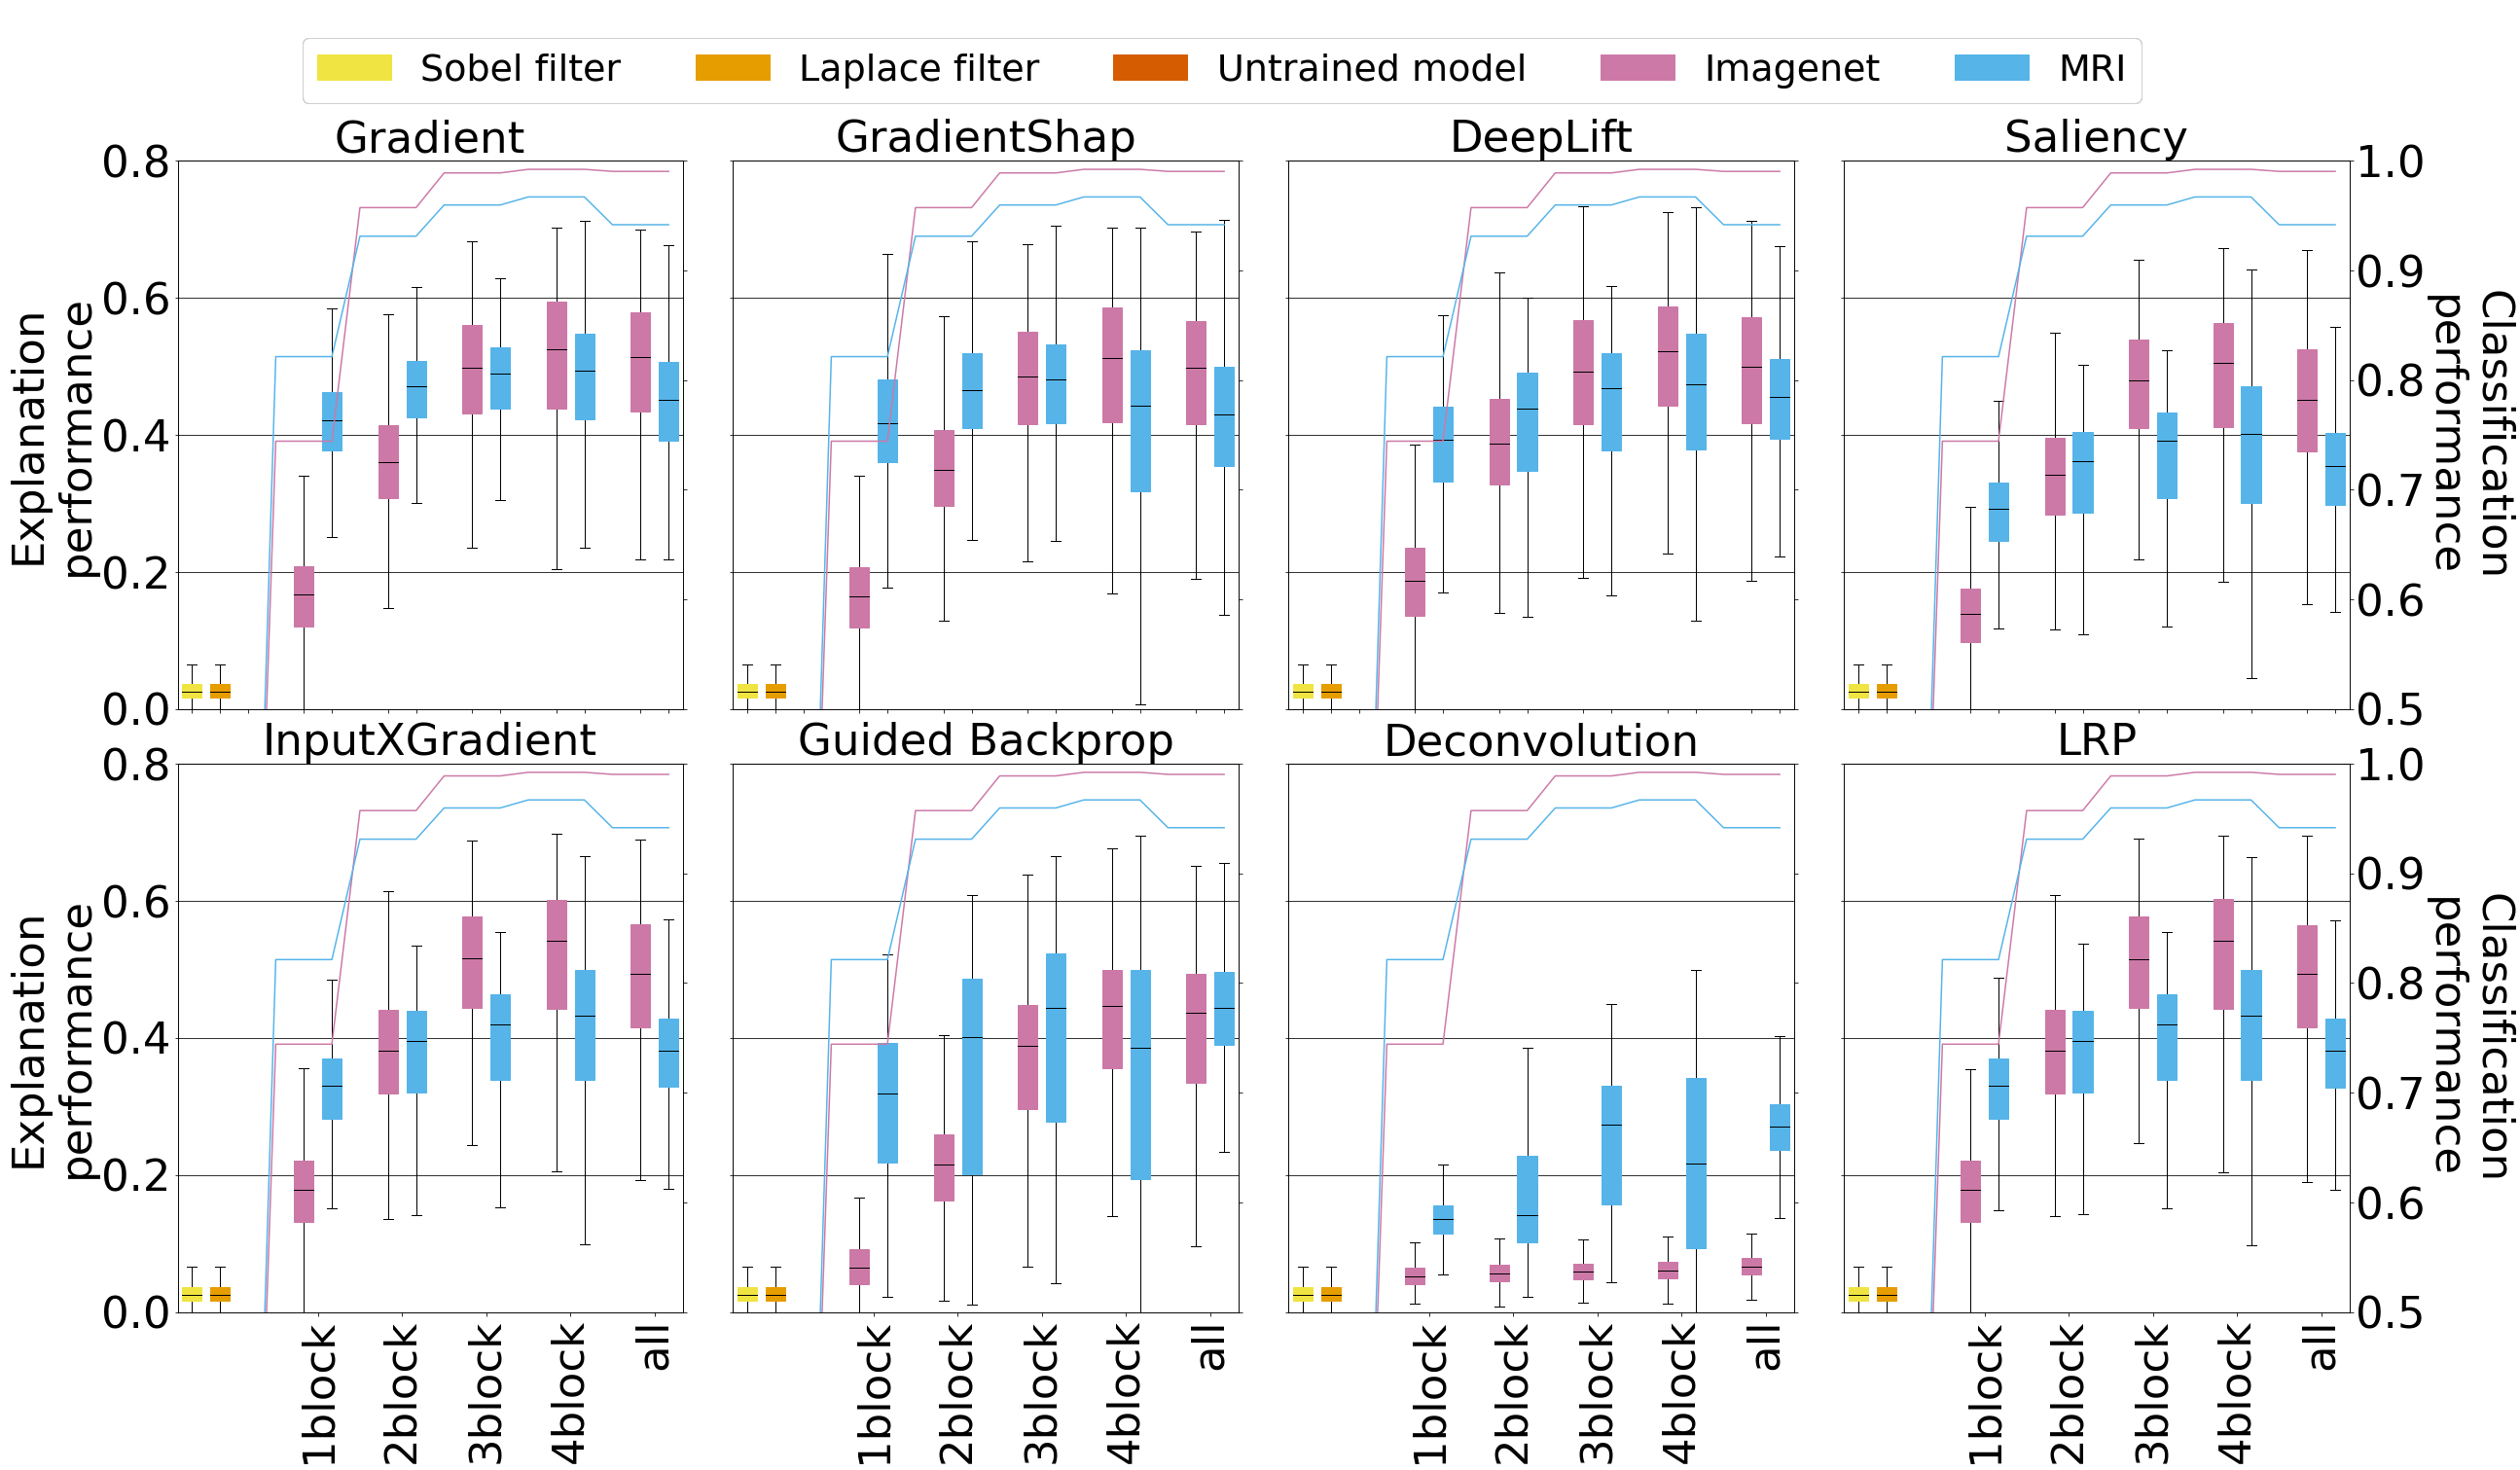

In [176]:

random  = {'gradient':[0],
              'gradshap':[0],
              'deeplift':[0],
              'saliency':[0],
              'inputXGrad':[0],
              'backprop':[0],
              'deconv':[0],
              'LRP':[0]}

create_boxplots(tpr_method_img_best, tpr_method_mri_best, accs_img_best, accs_mri_best, tpr_laplace_best, tpr_sobel_best, random)

In [177]:
with open('/home/martao/MRI_dataset/2ndTry/new_models_finetune_with_test_slices/same/save/metrics_same.pkl', 'rb') as f:
    metrics_same = pickle.load(f)
    
with open('/home/martao/MRI_dataset/2ndTry/new_models_finetune_with_test_slices/same/save/to_save.pkl', 'rb') as f:
    to_save_same_img = pickle.load(f)


In [178]:
    
tpr_method_img_same = {'gradient':{'1':[],'2':[],'3':[],'4':[],'a':[]},
              'gradshap':{'1':[],'2':[],'3':[],'4':[],'a':[]}, 
              'deeplift':{'1':[],'2':[],'3':[],'4':[],'a':[]}, 
              'saliency':{'1':[],'2':[],'3':[],'4':[],'a':[]}, 
              'inputXGrad':{'1':[],'2':[],'3':[],'4':[],'a':[]}, 
              'backprop':{'1':[],'2':[],'3':[],'4':[],'a':[]}, 
              'deconv':{'1':[],'2':[],'3':[],'4':[],'a':[]}, 
              'LRP':{'1':[],'2':[],'3':[],'4':[],'a':[]}}

accs_img_same={'1':[],'2':[],'3':[],'4':[],'a':[]}

for i in range(len(to_save_same_img)):
    model_name = to_save_same_img[i]['model']
    model_type = to_save_same_img[i]['type']
    finetune_degree = to_save_same_img[i]['block']

    if model_type == 'img':
        for xai_method in metrics_same[model_name+'.pt'].keys():
            TP = metrics_same[model_name+'.pt'][xai_method]['TP']
            TN = metrics_same[model_name+'.pt'][xai_method]['FN']
            
            tpr_method_img_same[xai_method][finetune_degree]+=obtain_TPR(TP,TN)
            
            accs_img_same[finetune_degree].append(to_save_same_img[i]['ACC'])
            
    
tpr_method_mri_same = {'gradient':{'1':[],'2':[],'3':[],'4':[],'a':[]},
              'gradshap':{'1':[],'2':[],'3':[],'4':[],'a':[]}, 
              'deeplift':{'1':[],'2':[],'3':[],'4':[],'a':[]}, 
              'saliency':{'1':[],'2':[],'3':[],'4':[],'a':[]}, 
              'inputXGrad':{'1':[],'2':[],'3':[],'4':[],'a':[]}, 
              'backprop':{'1':[],'2':[],'3':[],'4':[],'a':[]}, 
              'deconv':{'1':[],'2':[],'3':[],'4':[],'a':[]}, 
              'LRP':{'1':[],'2':[],'3':[],'4':[],'a':[]}}

accs_mri_same={'1':[],'2':[],'3':[],'4':[],'a':[]}

for i in range(len(to_save_same_img)):
    model_name = to_save_same_img[i]['model']
    model_type = to_save_same_img[i]['type']
    finetune_degree = to_save_same_img[i]['block']

    if model_type == 'MRI':
        for xai_method in metrics_same[model_name+'.pt'].keys():
            TP = metrics_same[model_name+'.pt'][xai_method]['TP']
            TN = metrics_same[model_name+'.pt'][xai_method]['FN']
            
            tpr_method_mri_same[xai_method][finetune_degree]+=obtain_TPR(TP,TN)
            
            accs_mri_same[finetune_degree].append(to_save_same_img[i]['ACC'])
            

In [179]:
with open('/home/martao/MRI_dataset/2ndTry/new_models_finetune_with_test_slices/same/save/laplace.pkl', 'rb') as f:
    laplace_same = pickle.load(f)
    
tpr_laplace_same = obtain_TPR(laplace_same['TP'],laplace_same['FP'])

with open('/home/martao/MRI_dataset/2ndTry/new_models_finetune_with_test_slices/same/save/sobel.pkl', 'rb') as f:
    sobel_same = pickle.load(f) 
    
tpr_sobel_same = obtain_TPR(sobel_same['TP'],sobel_same['FP'])



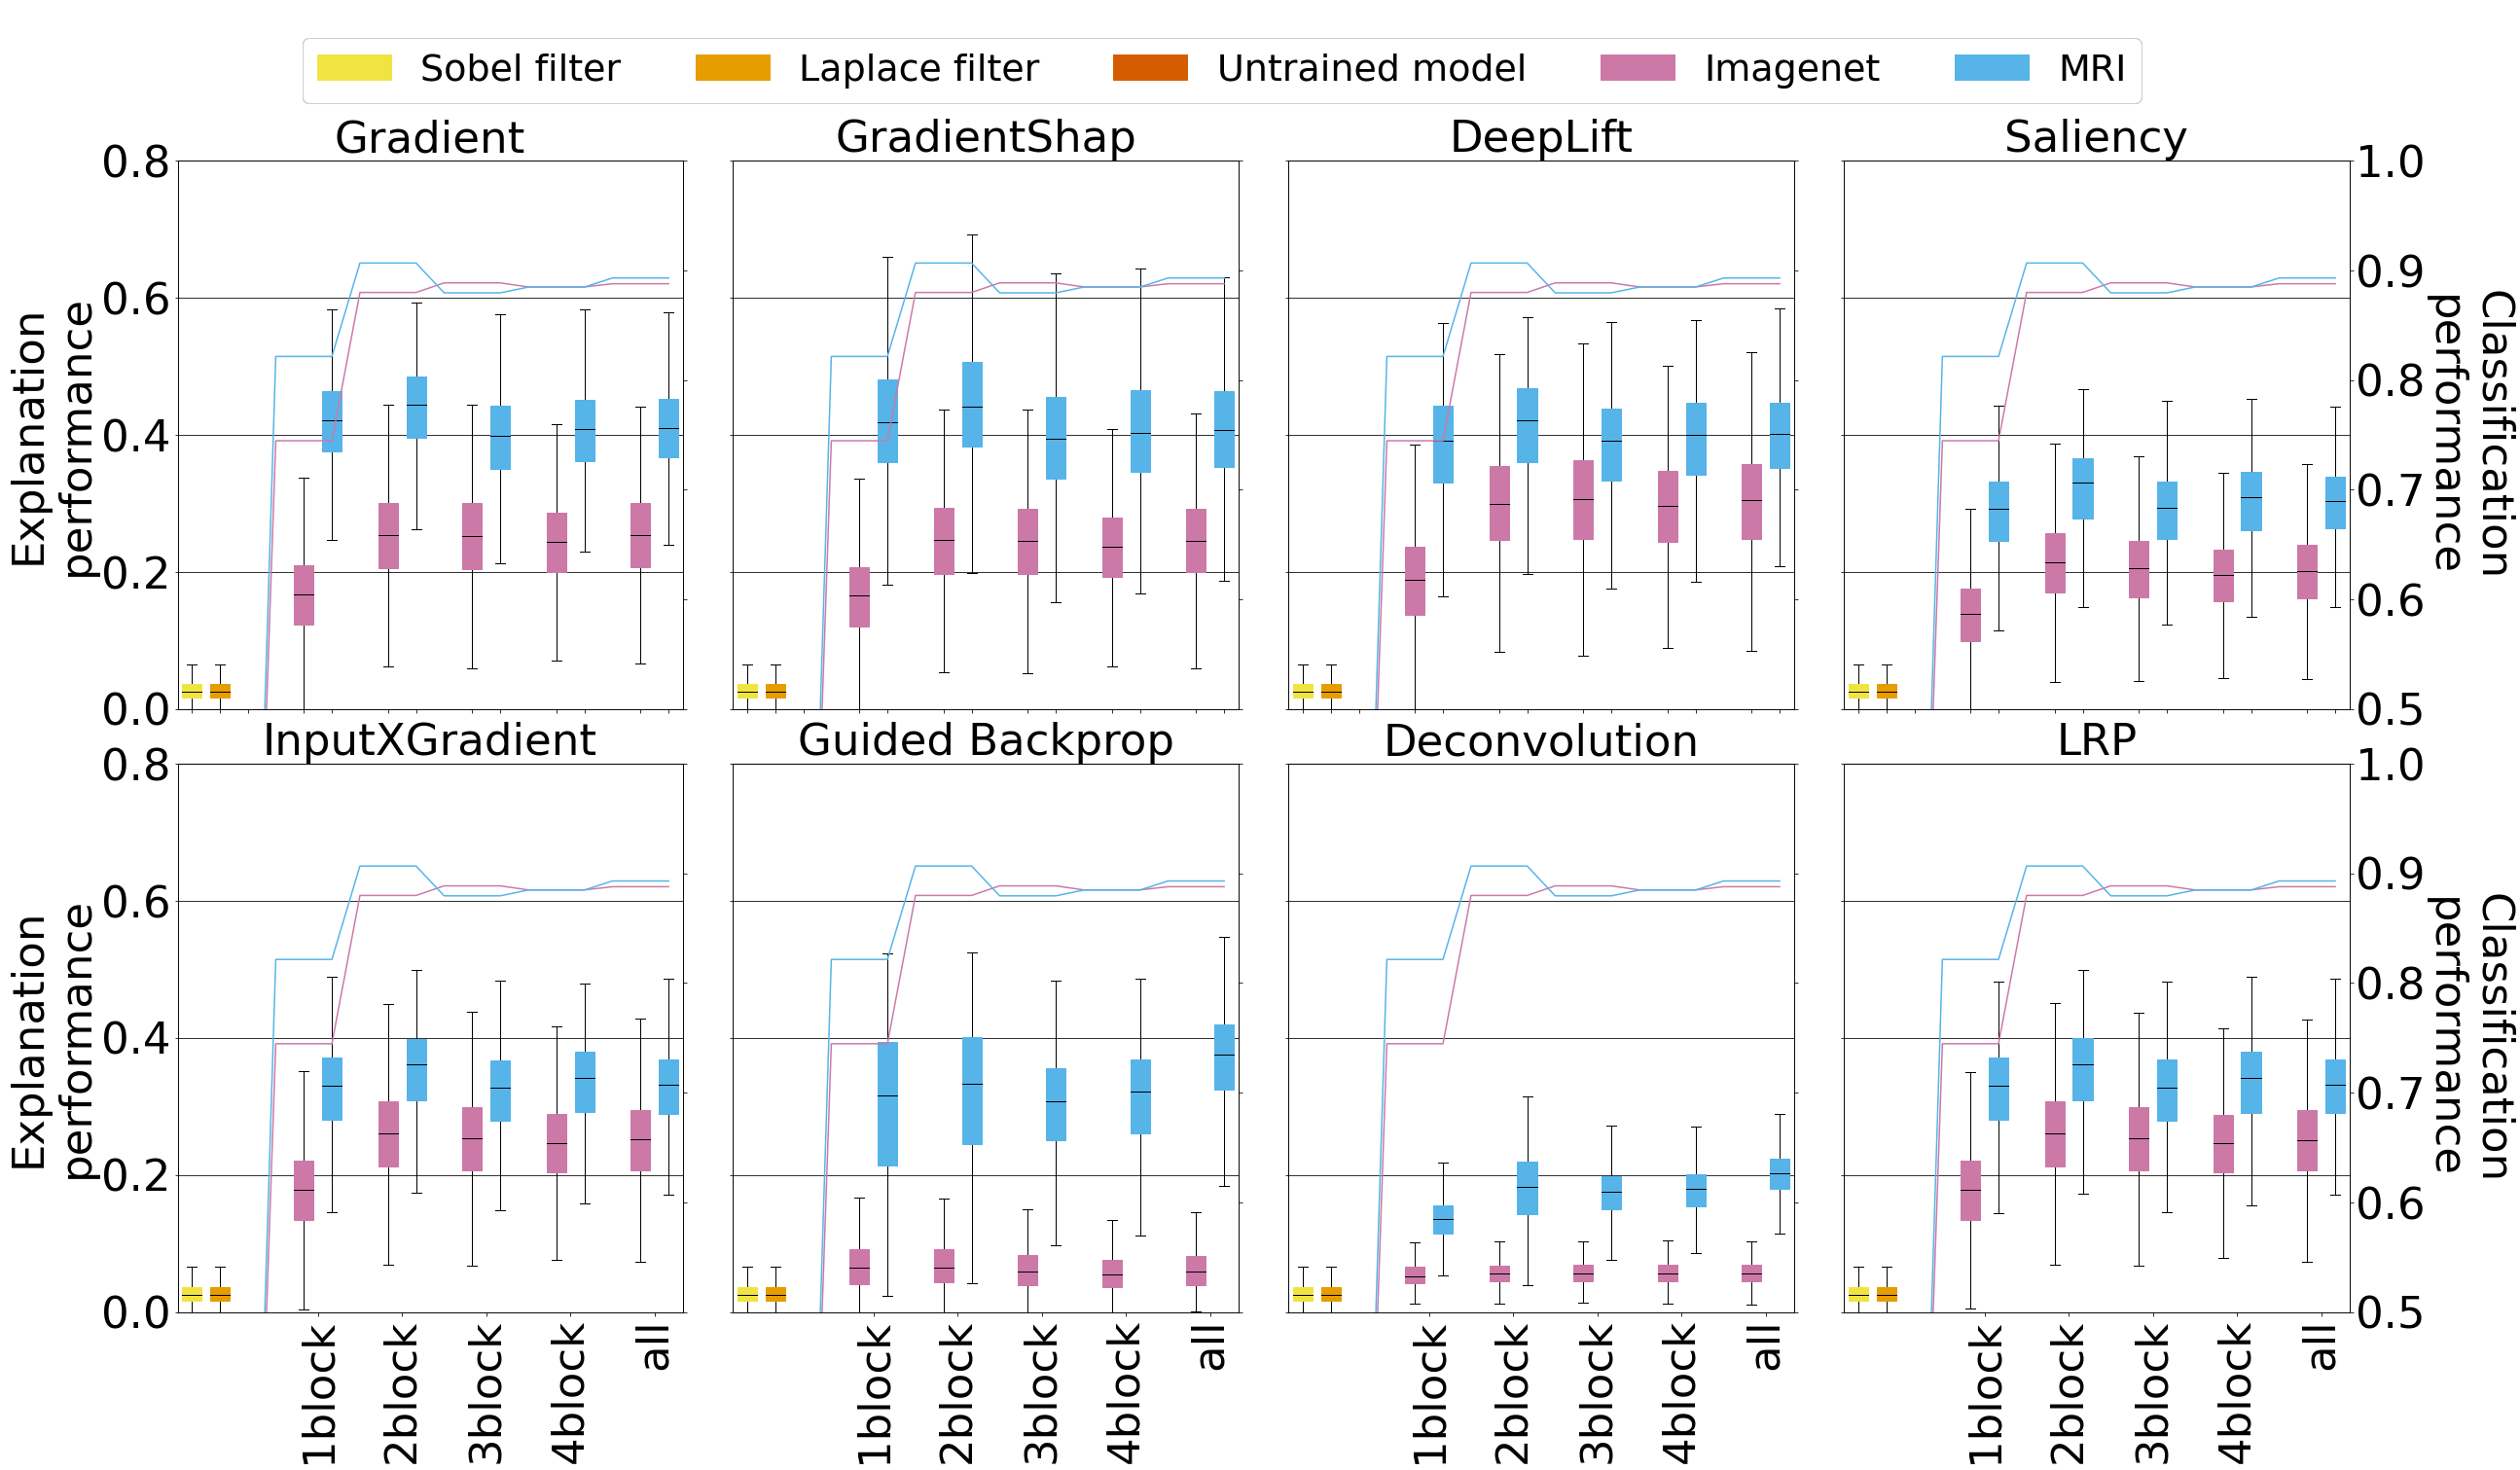

In [180]:

random  = {'gradient':[0],
              'gradshap':[0],
              'deeplift':[0],
              'saliency':[0],
              'inputXGrad':[0],
              'backprop':[0],
              'deconv':[0],
              'LRP':[0]}

create_boxplots(tpr_method_img_same,tpr_method_mri_same,accs_img_same,accs_mri_same,tpr_laplace_same,tpr_sobel_same,random)